# Question 1

In [14]:
!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

--2023-02-25 06:30:22--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt.2’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.09s   

2023-02-25 06:30:22 (2.66 MB/s) - ‘f150_motor_distributors.txt.2’ saved [255541/255541]



In [15]:
data = np.loadtxt("f150_motor_distributors.txt",delimiter=",")

In [16]:
def kmeans(data, k, initial_centroids):
  # initialize centroids to the given initial values
  centroids = initial_centroids
 
  # loop for a maximum of 100 iterations
  for i in range(100):
    # assign each data point to the closest centroid
    distances = np.zeros((len(data), len(centroids)))
    for i in range(len(data)):
        for j in range(len(centroids)):
            distances[i][j] = np.sqrt(np.sum((data[i] - centroids[j]) ** 2))

    labels = np.argmin(distances, axis=1)

    # update the centroids
    for j in range(k):
      centroids[j] = np.mean(data[labels == j], axis=0)

  return centroids, labels

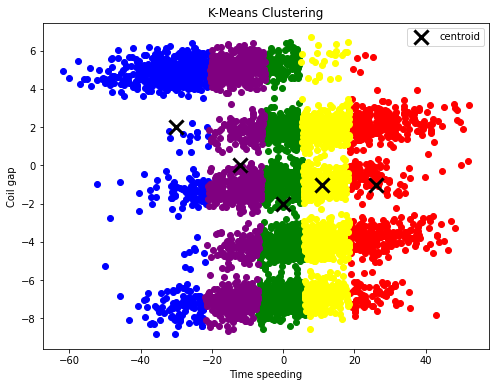

In [17]:
# initialize the centroids
initial_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

# run the k-means algorithm
centroids, labels = kmeans(data, 5, initial_centroids)

# visualize the results
fig = plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'purple']
for i in range(5):
  indices = np.where(labels == i)
  plt.scatter(data[indices, 0], data[indices, 1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k', label='centroid')
plt.legend()
plt.xlabel('Time speeding')
plt.ylabel('Coil gap')
plt.title('K-Means Clustering')
plt.show()

Scaling the data is an important preprocessing step that helps to normalize the data and bring all the features to the same scale. This ensures that each feature contributes equally to the clustering process.

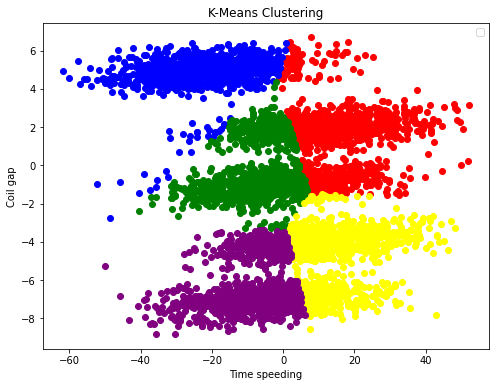

In [18]:
from sklearn.preprocessing import StandardScaler

# initialize the centroids
initial_centroids = np.array([[10, 10], [-10, 10], [2, 2], [3, 3], [-3, -3]])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_centroids = scaler.fit_transform(initial_centroids)

# run the k-means algorithm again
fig = plt.figure(figsize=(8, 6))
centroids, labels = kmeans(scaled_data, 5, scaled_centroids)
# visualize the results
colors = ['red', 'blue', 'green', 'yellow', 'purple']
for i in range(5):
  indices = np.where(labels == i)
  plt.scatter(data[indices, 0], data[indices, 1], c=colors[i])
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k')
plt.legend()
plt.xlabel('Time speeding')
plt.ylabel('Coil gap')
plt.title('K-Means Clustering')
plt.show()

# Question2

In [19]:
# p is a known relationship through Ford's quality control analysis
P = np.array([[10, 0.5], [-10, 0.25]])
factor = np.linalg.inv(P.T @ P)

# Mahalanobis Distance
def mahalanobis_distance(x, y, factor): 
    return (x - y).T @ factor @ (x - y)

def k_means(data, k, centroids):
    n_iterations = 1000
    for i in range(n_iterations):
        distances = np.zeros((data.shape[0], k))
        for j in range(k):
            distances[:, j] = [mahalanobis_distance(data[m], centroids[j], factor) for m in range(data.shape[0])]
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    return centroids, labels



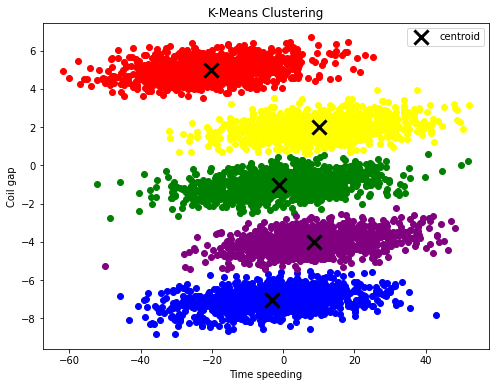

In [20]:
initial_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
centroids, labels = k_means(data, 5, initial_centroids)
fig = plt.figure(figsize=(8, 6))
# visualize the results
colors = ['red', 'blue', 'green', 'yellow', 'purple']
for i in range(5):
  indices = np.where(labels == i)
  plt.scatter(data[indices, 0], data[indices, 1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k', label='centroid')
plt.legend()
plt.xlabel('Time speeding')
plt.ylabel('Coil gap')
plt.title('K-Means Clustering')
plt.show()

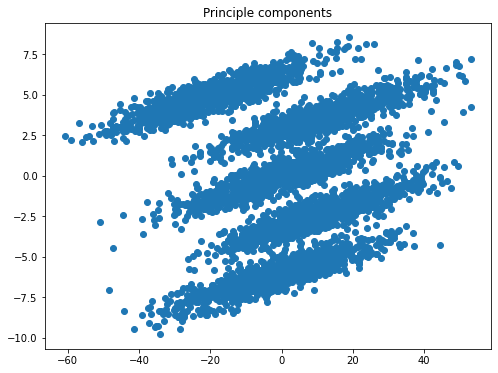

In [30]:
# Calculte the pca of the given data
def _pca(data):
  # center the data
  mean = np.mean(data, axis=0)
  centered_data = data - mean

  # calculate the covariance matrix of the centered data
  covariance_matrix = np.cov(centered_data.T)

  # calculate the eigenvectors and eigenvalues of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

  # sort the eigenvectors in decreasing order of their corresponding eigenvalues
  idx = eigenvalues.argsort()[::-1]
  sorted_eigenvectors = eigenvectors[:, idx]

  # use the sorted eigenvectors as the principal components
  principal_components = np.dot(centered_data, sorted_eigenvectors)
  
  
  fig = plt.figure(figsize=(8, 6))
  plt.scatter(principal_components[:, 0], principal_components[:, 1])
  plt.title('Principle components')
  

  plt.show()


# For all aggregate data
_pca(data)

In [36]:
# Verification using sklearn.decomposition
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(data)

# Access values and vectors
print("PCA result of data")
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

PCA result of data
[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]
[322.50713273  17.38845582]
[0.94884177 0.05115823]


[[  7.25405752  -0.25378307]
 [-18.11417956  -0.68829451]
 [ 27.23950349  -0.76561297]
 ...
 [  5.98078814   0.21199726]
 [  8.49049436   0.21735037]
 [-13.9396063   -0.44222502]]


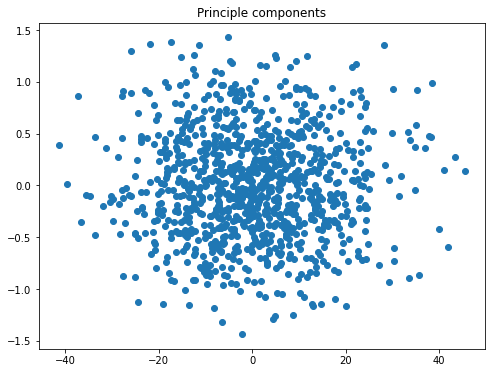

[[ -8.73419248  -0.91529791]
 [-23.71132555   0.34533961]
 [  1.94266087   0.75298475]
 ...
 [  6.37240317  -0.70787872]
 [-15.07539706   0.44106933]
 [  0.90286284  -0.33686259]]


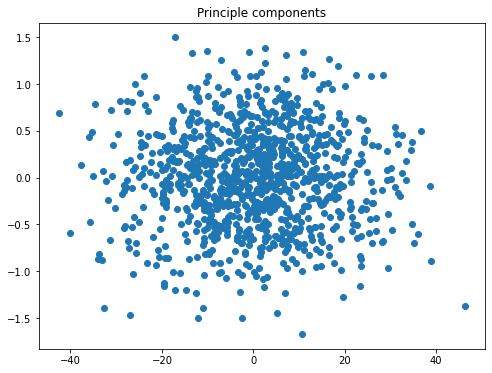

[[-11.82317836  -0.22101684]
 [ -7.97251269  -0.07352572]
 [-21.79151461   0.27086357]
 ...
 [-15.03445302  -0.59867838]
 [ 14.03297252   0.70765947]
 [-25.72231983  -0.29542422]]


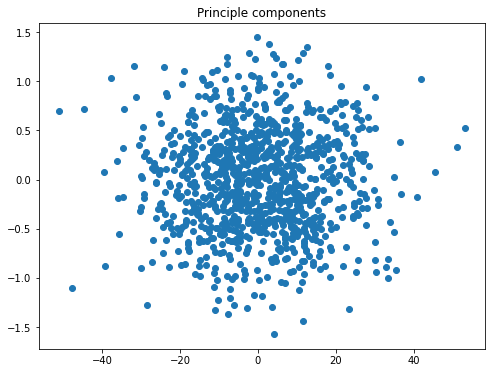

[[ 12.50154109  -0.080114  ]
 [ 26.88083768   0.15701845]
 [-12.34056372  -0.61900941]
 ...
 [ 28.29556699  -0.14442832]
 [ -8.76609494   0.96638809]
 [ -3.12687729  -0.41684377]]


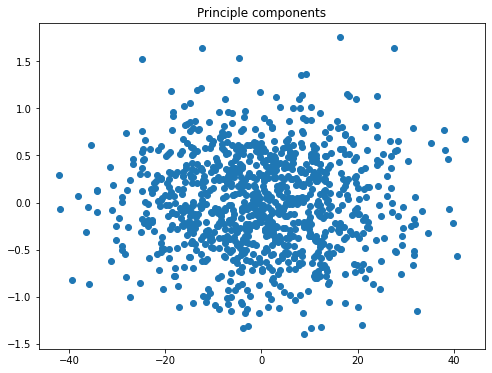

[[-25.99638961  -0.96756674]
 [-58.71301722  -0.41374627]
 [ -8.42892305  -0.14539332]
 ...
 [  1.42435118  -0.82899984]
 [-24.31180609  -0.48532642]
 [ -0.59071656  -0.68142565]]


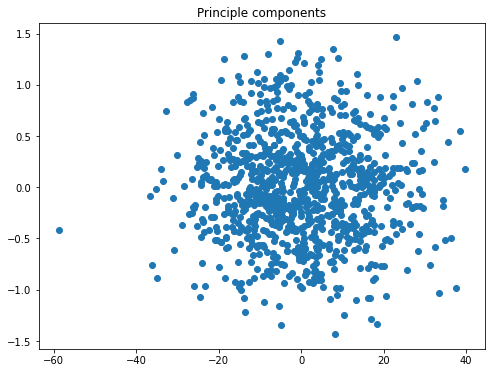

In [22]:
# For each cluster: 
for i in range(5):
  indices = np.where(labels == i)
  _pca(data[indices])

In [37]:
 # Verification using sklearn.decomposition
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)


for i in range(5):
  indices = np.where(labels == i)
  # Fit on data
  pca.fit(data[indices])

  # Access values and vectors
  print("PCA result of cluster", i)
  print(pca.components_)
  print(pca.explained_variance_)
  print(pca.explained_variance_ratio_)

PCA result of cluster 0
[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]
[195.0259165   0.2722047]
[0.99860621 0.00139379]
PCA result of cluster 1
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]
[204.376807     0.28339306]
[0.9986153 0.0013847]
PCA result of cluster 2
[[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]
[217.34942629   0.27670722]
[0.99872852 0.00127148]
PCA result of cluster 3
[[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]
[204.42164874   0.26977027]
[0.99868206 0.00131794]
PCA result of cluster 4
[[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]
[191.5356272    0.26355151]
[0.9986259 0.0013741]


In [59]:
P = np.array([[10, 0.5], [-10, 0.25]])

# Calculate the eigenvectors and eigenvalues of PT
eig_vals, eig_vecs = np.linalg.eig(P.T)

# Construct the diagonal matrix of eigenvalues
D = np.diag(eig_vals)

# Construct the matrix of eigenvectors
V = eig_vecs

# Print the diagonal matrix of eigenvalues and eigenvalues
print("Diagonal matrix of eigenvalues:\n", D)
print("Eigenvalues:\n", V )

# Print the product of V and D
print("V @ D:\n", V @ D)

# Reconstruct the matrix P using the eigendecomposition
P_reconstructed = V @ D @ V.T

# Print the reconstructed matrix P
print("Reconstructed matrix P:\n", P_reconstructed)

Diagonal matrix of eigenvalues:
 [[9.45693086 0.        ]
 [0.         0.79306914]]
Eigenvalues:
 [[0.99852863 0.7356769 ]
 [0.05422701 0.67733264]]
V @ D:
 [[9.44301625 0.58344264]
 [0.51282107 0.53717161]]
Reconstructed matrix P:
 [[9.85834739 0.90725126]
 [0.90725126 0.39165261]]
